In [18]:
import pyccl
import numpy as np
import sacc
import matplotlib.pyplot as plt
import h5py

In [3]:
cosmo = pyccl.Cosmology(Omega_c=0.2199999, Omega_b=0.0448, h=0.71, n_s=0.963, sigma8=0.8, A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, T_CMB=None, bcm_log10Mc=14.07918, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, sigma_0=0.0, c1_mg=1.0, c2_mg=1.0, lambda_mg=0.0, m_nu=0.0, m_nu_type=None, z_mg=None, df_mg=None, transfer_function='boltzmann_camb', matter_power_spectrum='halofit', baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', emulator_neutrinos='strict')

In [4]:
path = '../../TXPipe/data/cosmodc2/outputs_redmagic/2021/no_shape_noise/mag_sel_compare_descqa/'
file_real = 'twopoint_data_real.sacc'
s = sacc.Sacc.load_fits(path + file_real)

In [124]:
path_nz_txpipe = '../../TXPipe/data/cosmodc2/outputs_redmagic/2021/no_shape_noise/mag_sel_compare_descqa/shear_photoz_stack_300bins.hdf5'
f = h5py.File(path_nz_txpipe,'r')
z_txpipe_300 = f['n_of_z/source/z'][:]
Nz_txpipe_300 = f[f'n_of_z/source/bin_0'][:]

path_nz_txpipe = '../../TXPipe/data/cosmodc2/outputs_redmagic/2021/no_shape_noise/mag_sel_compare_descqa/shear_photoz_stack_600bins.hdf5'
f = h5py.File(path_nz_txpipe,'r')
z_txpipe_600 = f['n_of_z/source/z'][:]
Nz_txpipe_600 = f[f'n_of_z/source/bin_0'][:]

path_nz_txpipe = '../../TXPipe/data/cosmodc2/outputs_redmagic/2021/no_shape_noise/mag_sel_compare_descqa/shear_photoz_stack_1200bins.hdf5'
f = h5py.File(path_nz_txpipe,'r')
z_txpipe_1200 = f['n_of_z/source/z'][:]
Nz_txpipe_1200 = f[f'n_of_z/source/bin_0'][:]

path_nz_txpipe = '../../TXPipe/data/cosmodc2/outputs_redmagic/2021/no_shape_noise/mag_sel_compare_descqa/shear_photoz_stack_2000bins.hdf5'
f = h5py.File(path_nz_txpipe,'r')
z_txpipe_2000 = f['n_of_z/source/z'][:]
Nz_txpipe_2000 = f[f'n_of_z/source/bin_0'][:]

# descqa
path_descqa = '/global/cfs/cdirs/lsst/groups/CS/descqa/run/v2/2021-03/2021-03-02_1/shear/cosmoDC2_v1.1.4_image/'
z_vals, n_vals = np.loadtxt(path_descqa + 'nzs_z_0.41.txt', unpack = True)

In [125]:
len(z_txpipe_600), len(z_txpipe_1200)

(600, 1200)

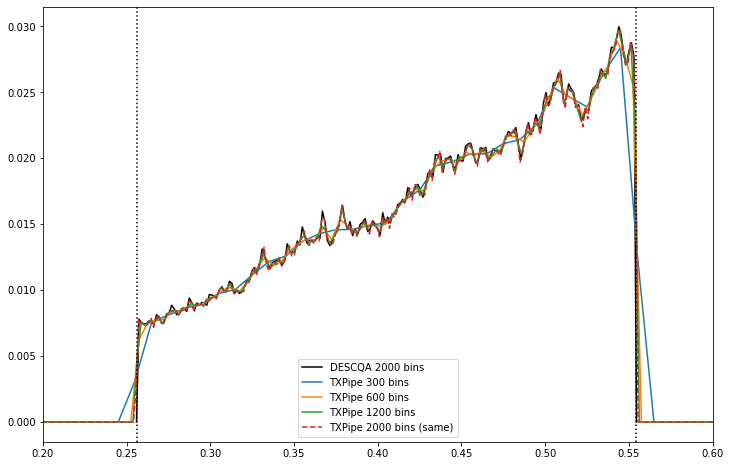

In [134]:
plt.figure(figsize=(12,8))
plt.plot(z_vals, n_vals*0.005, label = 'DESCQA 2000 bins', color = 'k')
plt.plot(z_txpipe_300, Nz_txpipe_300/2., label = 'TXPipe 300 bins')
plt.plot(z_txpipe_600, Nz_txpipe_600, label = 'TXPipe 600 bins')
plt.plot(z_txpipe_1200, Nz_txpipe_1200*2, ls = '-', label = 'TXPipe 1200 bins')
plt.plot(z_txpipe_2000, Nz_txpipe_2000*3.33, ls = '--', label = 'TXPipe 2000 bins (same)')
plt.xlim(0.2,0.6)
plt.axvline(x=0.25588604, color = 'k', ls = ':')
plt.axvline(x=0.55455363, color = 'k', ls =':' )
plt.legend()

In [127]:
def get_ccl_xip(zbin, theta, ell):
    tracer = pyccl.WeakLensingTracer(cosmo, (s.tracers['source_%s'%zbin].z, s.tracers['source_%s'%zbin].nz))
    cl = pyccl.angular_cl(cosmo, tracer, tracer, ell)
    ccl_xip = pyccl.correlation(cosmo, ell, cl, theta/60, corr_type='L+')
    return ccl_xip

def get_ccl_xip_morebins(zbin, theta, ell, z_tx, Nz_tx):
    print(len(z_tx))
    tracer = pyccl.WeakLensingTracer(cosmo, (z_tx, Nz_tx))
    cl = pyccl.angular_cl(cosmo, tracer, tracer, ell)
    ccl_xip = pyccl.correlation(cosmo, ell, cl, theta/60, corr_type='L+')
    return ccl_xip

def get_ccl_xip_descqa_nz(zbin, theta, ell):
    path_descqa = '/global/cfs/cdirs/lsst/groups/CS/descqa/run/v2/2021-03/2021-03-02_1/shear/cosmoDC2_v1.1.4_image/'
    z_vals, n_vals = np.loadtxt(path_descqa + 'nzs_z_0.41.txt', unpack = True)
    tracer = pyccl.WeakLensingTracer(cosmo, dndz=(z_vals, n_vals))
    cl = pyccl.angular_cl(cosmo, tracer, tracer, ell)
    ccl_xip = pyccl.correlation(cosmo, ell, cl, theta/60, corr_type='L+')
    return ccl_xip

In [6]:
ell = np.unique(np.logspace(np.log10(2),5,400).astype(int))
theta = np.array([  2.8271588 ,   3.56264215,   4.48519911,   5.64658811,
         7.10867413,   8.94928324,  11.26635476,  14.18334139,
        17.85553155,  22.47839057,  28.29784106,  35.62376583,
        44.84655642,  56.45676669,  71.07250828,  89.47289552,
       112.63510211, 141.7707274 , 178.43853811, 224.60713475])

In [128]:
# ccl dictionary
ccl = {}
ccl['xip'] = {}
ccl['xip_300bins'] = {}
ccl['xip_600bins'] = {}
ccl['xip_1200bins'] = {}
ccl['xip_2000bins'] = {}
ccl['xip_descqa_nz'] = {}

# cosmosis dictionary
csis = {}
csis['xip'] = {}

In [129]:
for zbin in range(1):
    ccl['xip']['bin%s'%zbin] = get_ccl_xip(zbin, theta, ell)
    ccl['xip_300bins']['bin%s'%zbin] = get_ccl_xip_morebins(zbin, theta, ell, z_txpipe_300, Nz_txpipe_300)
    ccl['xip_600bins']['bin%s'%zbin] = get_ccl_xip_morebins(zbin, theta, ell, z_txpipe_600, Nz_txpipe_600)
    ccl['xip_1200bins']['bin%s'%zbin] = get_ccl_xip_morebins(zbin, theta, ell, z_txpipe_1200, Nz_txpipe_1200)
    ccl['xip_2000bins']['bin%s'%zbin] = get_ccl_xip_morebins(zbin, theta, ell, z_txpipe_2000, Nz_txpipe_2000)
    ccl['xip_descqa_nz']['bin%s'%zbin] = get_ccl_xip_descqa_nz(zbin, theta, ell)

/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v2/envs/desc/lib/python3.7/site-packages/pyccl/correlations.py:84: CCLWarning: corr_type is deprecated. Use type = GG+
  CCLWarning)


300
600
1200
2001


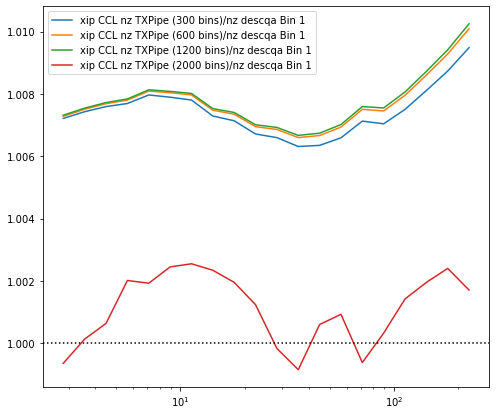

In [136]:
plt.figure(figsize=(8,7))
for zbin in range(1):
    #plt.plot(theta, ccl['xip']['bin%s'%zbin]/ccl['xip_descqa_nz']['bin%s'%zbin], label = 'xip CCL nz TXPipe/nz descqa Bin %s'%(zbin+1))
    plt.plot(theta, ccl['xip_300bins']['bin%s'%zbin]/ccl['xip_descqa_nz']['bin%s'%zbin], label = 'xip CCL nz TXPipe (300 bins)/nz descqa Bin %s'%(zbin+1))
    plt.plot(theta, ccl['xip_600bins']['bin%s'%zbin]/ccl['xip_descqa_nz']['bin%s'%zbin], label = 'xip CCL nz TXPipe (600 bins)/nz descqa Bin %s'%(zbin+1))
    plt.plot(theta, ccl['xip_1200bins']['bin%s'%zbin]/ccl['xip_descqa_nz']['bin%s'%zbin], label = 'xip CCL nz TXPipe (1200 bins)/nz descqa Bin %s'%(zbin+1))
    plt.plot(theta, ccl['xip_2000bins']['bin%s'%zbin]/ccl['xip_descqa_nz']['bin%s'%zbin], label = 'xip CCL nz TXPipe (2000 bins)/nz descqa Bin %s'%(zbin+1))
    #plt.plot(theta, ccl['xip_morebins']['bin%s'%zbin]/ccl['xip_descqa_nz']['bin%s'%zbin], label = 'xip CCL nz TXPipe (same bins as DESCQA)/nz descqa Bin %s'%(zbin+1))
    #plt.plot(theta, ccl['xip']['bin%s'%zbin]/ccl['xip_morebins']['bin%s'%zbin], label = 'xip CCL nz TXPipe/nz TXPipe more bins Bin %s'%(zbin+1))
plt.axhline(y=1, color = 'k', ls = ':')
plt.legend(frameon = True)
plt.xscale('log')

In [11]:
csis['xip']['bin0'] = np.array([1.93763283e-05, 1.61606109e-05, 1.33470149e-05, 1.09452503e-05,
       8.94132145e-06, 7.30105445e-06, 5.97655974e-06, 4.91319422e-06,
       4.05673391e-06, 3.35883369e-06, 2.78014056e-06, 2.29121838e-06,
       1.87178459e-06, 1.50896374e-06, 1.19520237e-06, 9.26259959e-07,
       6.99583177e-07, 5.12907084e-07, 3.63189213e-07, 2.46922205e-07])

csis['xip']['bin1'] = np.array([4.44626235e-05, 3.66137426e-05, 2.99733572e-05, 2.44900521e-05,
       2.00475795e-05, 1.64896317e-05, 1.36467954e-05, 1.13570277e-05,
       9.48068451e-06, 7.90801571e-06, 6.56016682e-06, 5.38565429e-06,
       4.35439907e-06, 3.45122343e-06, 2.66960345e-06, 2.00653826e-06,
       1.45891014e-06, 1.02127355e-06, 6.85328291e-07, 4.40969050e-07])

csis['xip']['bin2'] = np.array([7.52530563e-05, 6.19582126e-05, 5.09470741e-05, 4.19791254e-05,
       3.47420883e-05, 2.89020697e-05, 2.41462381e-05, 2.02066757e-05,
       1.68737076e-05, 1.39974372e-05, 1.14806289e-05, 9.26718029e-06,
       7.32937103e-06, 5.65544538e-06, 4.23949492e-06, 3.07420834e-06,
       2.14680345e-06, 1.43832521e-06, 9.25172023e-07, 5.63077333e-07])

csis['xip']['bin3'] = np.array([1.20217098e-04, 9.96902842e-05, 8.28322146e-05, 6.90779881e-05,
       5.78321412e-05, 4.85394424e-05, 4.07339830e-05, 3.40534281e-05,
       2.82404863e-05, 2.31300736e-05, 1.86285035e-05, 1.46907349e-05,
       1.12978298e-05, 8.43849263e-06, 6.09600632e-06, 4.24144912e-06,
       2.83364305e-06, 1.81829457e-06, 1.10310859e-06, 5.97495437e-07])

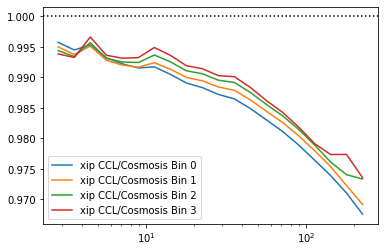

In [12]:
for zbin in range(4):
    plt.plot(theta, ccl['xip']['bin%s'%zbin]/csis['xip']['bin%s'%zbin], label = 'xip CCL/Cosmosis Bin %s'%zbin)
plt.axhline(y=1, color = 'k', ls = ':')
plt.legend(frameon = True)
plt.xscale('log')

In [13]:
theta_csis_rad = np.array([0.00082294, 0.00103606, 0.00130435, 0.00164213, 0.00206736,
       0.0026028 , 0.00327657, 0.00412498, 0.00519323, 0.00653767,
       0.00823073, 0.01036155, 0.01304434, 0.01642187, 0.02067348,
       0.02602585, 0.03276411, 0.04124591, 0.05192414, 0.06536837])

In [14]:
def rad_to_arcmin(rad):
    return rad*180/np.pi*60

In [15]:
theta_csis = rad_to_arcmin(theta_csis_rad)

In [16]:
cosmo

pyccl.Cosmology(Omega_c=0.219996, Omega_b=0.0447927, h=0.71, n_s=0.963, sigma8=0.8, A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.04, w0=-1.0, wa=0.0, T_CMB=None, bcm_log10Mc=14.07918, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, sigma_0=0.0, m_nu=0.0, m_nu_type=None, z_mg=None, df_mg=None, transfer_function='boltzmann_camb', matter_power_spectrum='halofit', baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', emulator_neutrinos='strict')